### K-means Clustering

- k個の集団でデータを分類するアルゴリズム
- 探さなければならない結果値を知らなくても適用できる方法(非地図学習:Unsupervised Learning)
- パラメータで配信された群集の数のkによって、それぞれの群集の中心点を基準に分類する。
- 各群集に属するデータ間の凝集度を最大に(距離を最小化する)k個の群集に分割する。
    - 分割したいk個の群集個数をパラメータで伝達する。
    - 各群集毎の中心と群集内のデータとの距離の二乗和を最小にする群集を探すことがアルゴリズムの目標である。
    - 任意に選択したk個の中心点を基準に分割した後、それぞれのデータについて最も近い中心につなげて分割し、この作業を繰り返す。
    - 所属群集が変更されなかったり,中心点が変わらない状態になったら繰り返しを中止して終了する。
    - 初期値(入力したk値)によってClusteringの結果が変わる。
    - 旧型分布を有するデータに対して群集を生成して分割するのに適している。
- 入力変数に対する正規化が必要である。
    - 値の単位が異なる場合、値の大きい特定の変数によって結果値が偏ることがある。
    - 入力変数をスケーリング、正規化する作業が必要である。
- インデックス形式の群集レーベルが生成され、学習が繰り返されるたびに任意で変更されることがある。
- 群集の数を入力しなければならず、中心点の初期値を任意に指定するという点でエラーの可能性が高い

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets #サンプルデータセットの提供
from sklearn.cluster import KMeans # KMeans Clusteringのアルゴリズムを提供

In [13]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
labels = pd.DataFrame(iris.target)
labels

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [16]:
data  = pd.DataFrame(iris.data)
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [17]:
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
data

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [18]:
# 入力変数(問題),従属変数(答え)のデータの結合
data = pd.concat([data, labels], axis=1)
data.head()

,sepal length,sepal width,petal length,petal width,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'labels']
data.head()

,sepal length,sepal width,petal length,petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
# データから2つの変数だけ抽出
# sepal length, sepal width
# KMeans:非地図学習なので従属変数(正解)なしに独立変数(問題)だけを使う。
sample1 = data[['sepal length', 'sepal width']]
sample1.head()

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [42]:
# KMeansモデルを生成
# ユーザーが操作して入力する値 : 入力変数、k値(初期値)
# 初期値:3つ
# KMeansのオブジェクトを生成する際、n_clustersパラメータの値でk値を配信
kmeans3 = KMeans(n_clusters=3)

In [43]:
# モデルの学習
# model.fit(input_data)
# 地図学習 => model.fit(x, y)
kmeans3.fit(sample1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
# 学習結果(予測した群集番号)の返還を受ける。
# fitの実行後 -> predict
label_cluster = kmeans3.predict(sample1)
label_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [45]:
sample1.head(2)

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0


In [46]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 下の段階(ラベルのencoding ~ 精度)までは KMeans Clustering で有効でない結果

In [47]:
# 予測データ
cluster_pred = pd.Series(label_cluster)
cluster_pred

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
120    0
121    2
122    0
123    2
124    0
125    0
126    2
127    2
128    0
129    0
130    0
131    0
132    0
133    2
134    2
135    0
136    0
137    0
138    2
139    0
140    0
141    0
142    2
143    0
144    0
145    0
146    2
147    0
148    0
149    2
Length: 150, dtype: int32

In [48]:
# 予測値
cluster = cluster_pred.values

In [49]:
# 実際のラベル
label = data['labels'].values

In [50]:
# 正確度(非指導学習)
from sklearn import metrics

metrics.adjusted_rand_score(cluster, label)

0.6006861021484542

In [51]:
# 入力変数のデータとKmeansの結果データを合わせる。
pred = pd.DataFrame(kmeans3.predict(sample1))
pred

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [53]:
pred.columns = ['predict']
pred

,predict
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [54]:
sample1.head()

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [55]:
# 問題で使用したsample1と推論した結果であるpredをconcatに統合する。
result = pd.concat([sample1, pred], axis=1)
result.head()

,sepal length,sepal width,predict
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


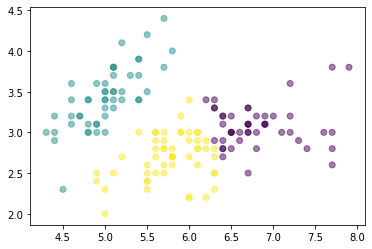

In [56]:
# (練習問題)結果に対する算点図を視覚化してください。
# plt.scatter()
# x軸、y軸:入力変数(問題)値
# 色 : predictのコラム
# 透明度:alpha=0.5
plt.scatter(result['sepal length'], result['sepal width'], c=result['predict'], alpha=0.5)

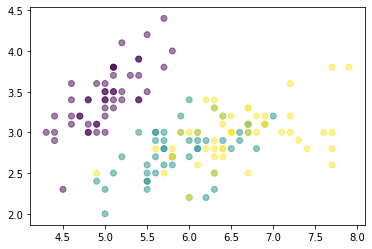

In [57]:
# dataの['sepal length'] ['sepal width']をx,yに、そして['labels']を色で散点図をもう一つ描く
plt.scatter(data['sepal length'], data['sepal width'], c=data['labels'], alpha=0.5)

In [58]:
# 群集の中心点を視覚化
# model.cluster_centers_
points = kmeans3.cluster_centers_
points

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

In [59]:
# 中心点の位置をDataFrame
centers = pd.DataFrame(points, columns = ['sepal length', 'sepal width'])
centers

,sepal length,sepal width
0,6.812766,3.074468
1,5.006000,3.428000
2,5.773585,2.692453


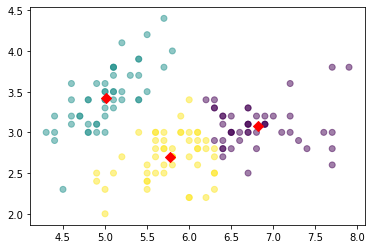

In [63]:
# 群集自体の視覚化
plt.scatter(result['sepal length'], result['sepal width'], c=result['predict'], alpha=0.5)
# 群集中心点の視覚化
plt.scatter(centers['sepal length'], centers['sepal width'], c='r', marker='D', s=50)